# Лабораторная работа №1
## ----------------------------------------------------------------------------------------------------------------------------------
## Задание:
1. Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).
2. Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

## Решение:

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [36]:
# Загрузка данных
data = pd.read_csv('all_players.csv')  # Замени на путь к файлу
# Показать первые строки данных для проверки
print(data.head())

   Unnamed: 0             Name     Nation             Club Position  Age  \
0           0    Kylian Mbappé     France         Paris SG       ST   24   
1           1   Erling Haaland     Norway  Manchester City       ST   23   
2           2  Kevin De Bruyne    Belgium  Manchester City       CM   32   
3           3     Lionel Messi  Argentina   Inter Miami CF       CF   36   
4           4    Karim Benzema     France       Al Ittihad       CF   35   

   Overall  Pace  Shooting  Passing  ...  Strength  Aggression  Att work rate  \
0       91    97        90       80  ...        77          64           High   
1       91    89        93       66  ...        93          87           High   
2       91    72        88       94  ...        74          75           High   
3       90    80        87       90  ...        68          44            Low   
4       90    79        88       83  ...        82          63         Medium   

   Def work rate  Preferred foot  Weak foot  Skill moves

In [37]:
# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Применяем Label Encoding к столбцу 'Attack Type'
data['Preferred foot Encoded'] = label_encoder.fit_transform(data['Preferred foot'])

# Проверка результатов
print(data[['Preferred foot', 'Preferred foot Encoded']].head())

  Preferred foot  Preferred foot Encoded
0          Right                       1
1           Left                       0
2          Right                       1
3           Left                       0
4          Right                       1


In [38]:
# Выбираем столбцы, не являющиеся числовыми
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Удаляем столбцы с нечисловыми данными из DataFrame
data = data.drop(columns=non_numeric_columns)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 5 to 17320
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1952 non-null   int64  
 1   Age                     1952 non-null   int64  
 2   Overall                 1952 non-null   int64  
 3   Pace                    1952 non-null   int64  
 4   Shooting                1952 non-null   int64  
 5   Passing                 1952 non-null   int64  
 6   Dribbling               1952 non-null   int64  
 7   Defending               1952 non-null   int64  
 8   Physicality             1952 non-null   int64  
 9   Acceleration            1952 non-null   int64  
 10  Sprint                  1952 non-null   int64  
 11  Positioning             1952 non-null   int64  
 12  Finishing               1952 non-null   int64  
 13  Shot                    1952 non-null   int64  
 14  Long                    1952 non-null  

In [39]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(['Preferred foot Encoded'], axis=1)
y = data['Preferred foot Encoded']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели k-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели
knn.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели k-ближайших соседей: {accuracy:.2f}')

Точность модели k-ближайших соседей: 0.87


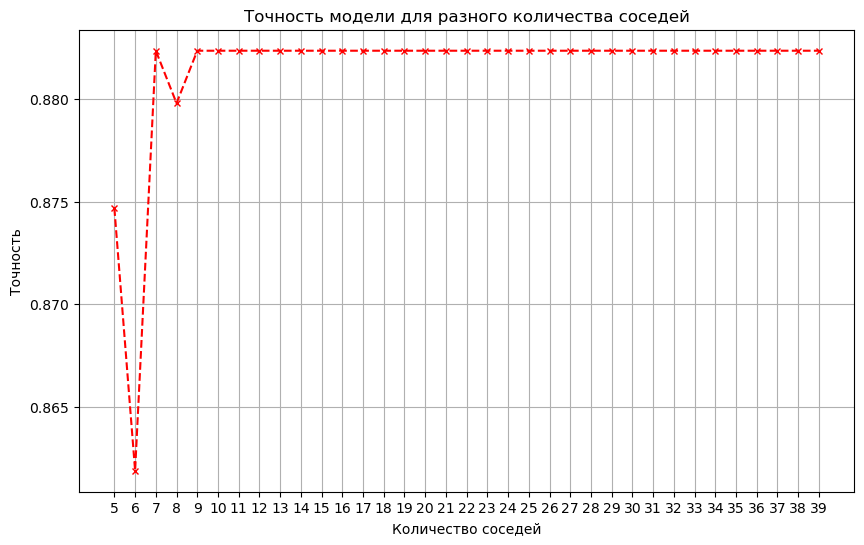

In [45]:
# Пустые списки для сохранения точности и количества соседей
accuracies = []
neighbors = range(5, 40)  # Попробуем количество соседей от 1 до 20

# Проходимся по разным значениям количества соседей
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='x', linestyle='dashed', color='red', markersize=4)
plt.title('Точность модели для разного количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

Выбор гиперпараметров в модели машинного обучения, такой как количество соседей (в случае метода k-ближайших соседей), часто осуществляется путем применения техник перекрестной проверки (cross-validation). Перекрестная проверка помогает оценить, как хорошо модель обобщает данные, и избежать переобучения или недообучения.

Оптимальное количество соседей можно выбрать путем использования перекрестной проверки для разных значений этого гиперпараметра и выбора того, которое демонстрирует наилучшую производительность на тестовом наборе данных.